In [ ]:
# Instala a versão mais recente do PySUS
!pip install git+https://github.com/AlertaDengue/PySUS.git --upgrade

# Reinicie o ambiente manualmente após a instalação (Runtime > Restart Runtime)

In [1]:
# --- Importações ---
import pandas as pd
import matplotlib.pyplot as plt
from pysus.online_data.SINAN import download

# --- Download dos dados de LEPTOSPIROSE (LEPT), ano 2024 ---
dados = download("LEPT", 2024)

# --- Conversão para DataFrame ---
df = dados.to_dataframe()

# --- Verificação da dimensão do DataFrame ---
print(f"Número de linhas: {df.shape[0]}")
print(f"Número de colunas: {df.shape[1]}")

# --- Visualização das primeiras linhas ---
df.head()


LEPTBR24.parquet: 100%|██████████| 43.7k/43.7k [00:02<00:00, 16.6kB/s]


Número de linhas: 14242
Número de colunas: 121


,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,...,DT_RISCO4,CO_MUN_R1,CO_MUN_R2,CO_MUN_R3,CO_MUN_R4,CO_UF_R1,CO_UF_R2,CO_UF_R3,CO_UF_R4,NU_LOTE_I
0,2,A279,2024-01-01,202401,2024,41,410690,1356,9214097,2023-12-24,...,,,,,,,,,,
1,2,A279,2024-01-01,202401,2024,33,330220,,6855334,2023-12-28,...,,,,,,,,,,
2,2,A279,2024-01-01,202401,2024,12,120020,1941,5336171,2023-12-24,...,,,,,,,,,,
3,2,A279,2024-01-01,202401,2024,15,150320,1486,2804638,2023-12-30,...,,,,,,,,,,
4,2,A279,2024-01-01,202401,2024,15,150240,1486,2674769,2023-12-27,...,,,,,,,,,,


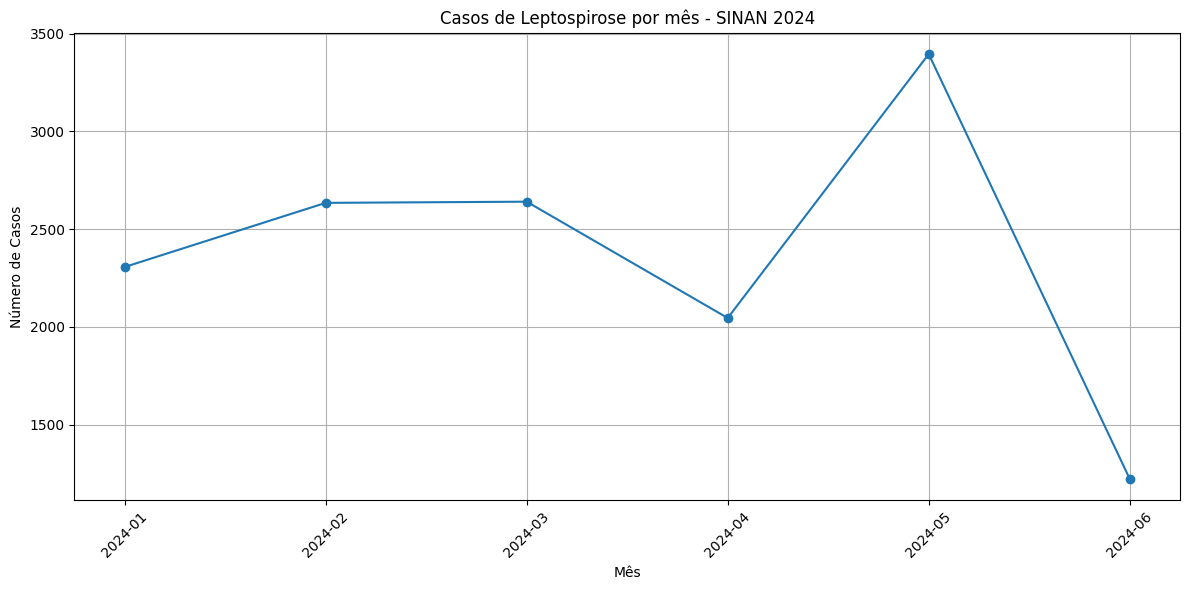

In [2]:
# Converte coluna de data
df['DT_NOTIFIC'] = pd.to_datetime(df['DT_NOTIFIC'], errors='coerce')

# Agrupa por mês
casos_mensais = df['DT_NOTIFIC'].dt.to_period('M').value_counts().sort_index()
casos_mensais = casos_mensais.rename_axis('Mes').reset_index(name='Casos')

# Gráfico
plt.figure(figsize=(12,6))
plt.plot(casos_mensais['Mes'].astype(str), casos_mensais['Casos'], marker='o')
plt.xticks(rotation=45)
plt.title("Casos de Leptospirose por mês - SINAN 2024")
plt.xlabel("Mês")
plt.ylabel("Número de Casos")
plt.grid(True)
plt.tight_layout()
plt.show()


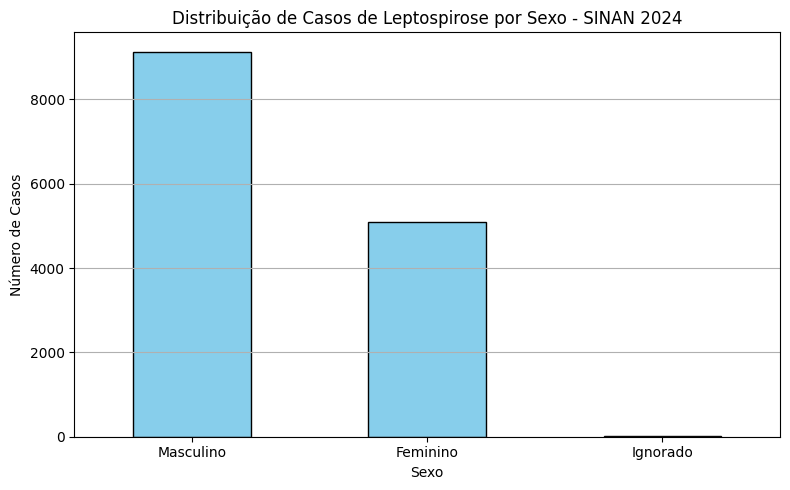

In [3]:
sexo_counts = df['CS_SEXO'].value_counts(dropna=False)
sexo_labels = {
    'M': 'Masculino',
    'F': 'Feminino',
    'I': 'Ignorado',
    '': 'Vazio',
    pd.NA: 'Não informado',
    None: 'Não informado'
}
sexo_counts.index = [sexo_labels.get(s, str(s)) for s in sexo_counts.index]

plt.figure(figsize=(8,5))
sexo_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribuição de Casos de Leptospirose por Sexo - SINAN 2024")
plt.xlabel("Sexo")
plt.ylabel("Número de Casos")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


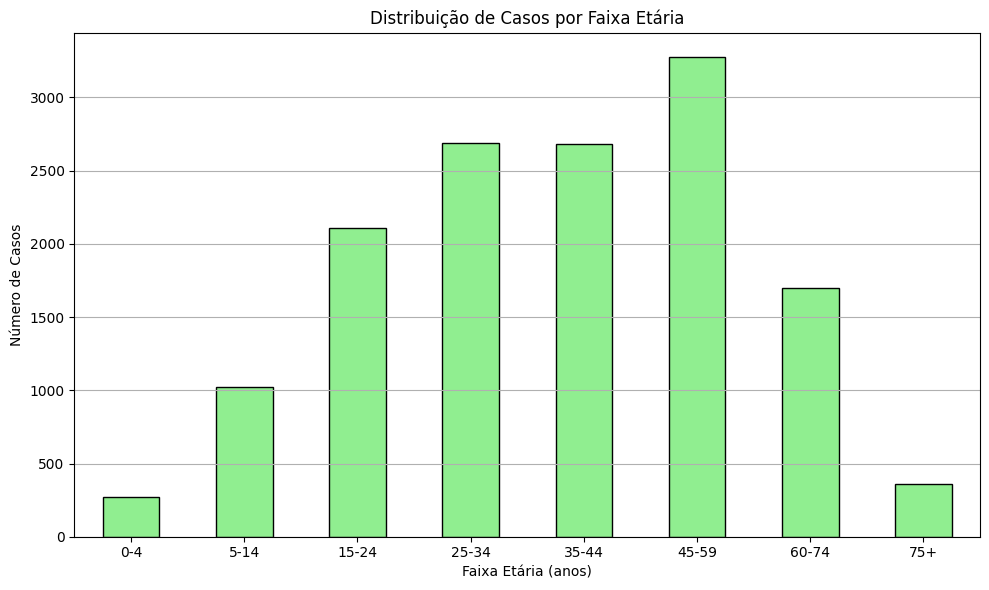

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Garantir datetime
df['DT_NOTIFIC'] = pd.to_datetime(df['DT_NOTIFIC'], errors='coerce')

# Cálculo de idade a partir de ANO_NASC
def calcular_idade_aprox(row):
    try:
        ano_nasc = str(row['ANO_NASC']).strip()
        if not ano_nasc.isdigit():
            return None
        return row['DT_NOTIFIC'].year - int(ano_nasc)
    except:
        return None

df['IDADE_CALCULADA'] = df.apply(calcular_idade_aprox, axis=1)

# Criar faixas etárias
faixas = pd.cut(
    df['IDADE_CALCULADA'],
    bins=[0, 5, 14, 24, 34, 44, 59, 74, 120],
    labels=['0-4', '5-14', '15-24', '25-34', '35-44', '45-59', '60-74', '75+']
)

# Contagem
faixa_counts = faixas.value_counts().sort_index()

# Gráfico
plt.figure(figsize=(10,6))
faixa_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Distribuição de Casos por Faixa Etária")
plt.xlabel("Faixa Etária (anos)")
plt.ylabel("Número de Casos")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

